In [ ]:
import re
import matplotlib.pyplot as plt

# Epoch = 128

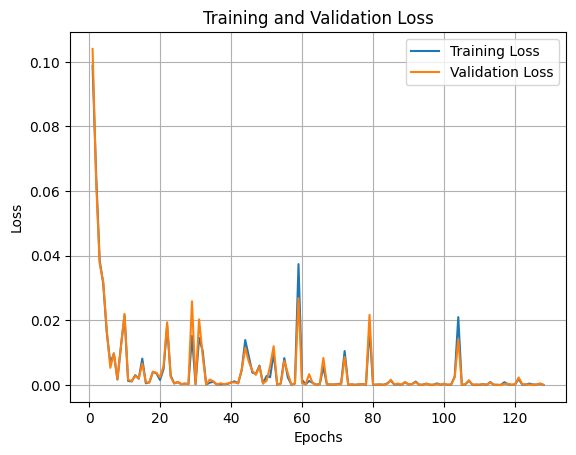

In [ ]:
# Sample training record text
training_record_text = """
Training epoch 1: 100%|██████████| 900/900 [01:28<00:00, 10.11it/s, loss=0.0988]
Validation epoch 1: 100%|██████████| 100/100 [00:04<00:00, 22.42it/s, val_loss=0.104]
Training epoch 2: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.0653]
Validation epoch 2: 100%|██████████| 100/100 [00:04<00:00, 22.58it/s, val_loss=0.063]
Training epoch 3: 100%|██████████| 900/900 [01:31<00:00,  9.83it/s, loss=0.0385]
Validation epoch 3: 100%|██████████| 100/100 [00:04<00:00, 21.62it/s, val_loss=0.0376]
Training epoch 4: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.0314]
Validation epoch 4: 100%|██████████| 100/100 [00:04<00:00, 22.65it/s, val_loss=0.032]
Training epoch 5: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.0162]
Validation epoch 5: 100%|██████████| 100/100 [00:04<00:00, 22.53it/s, val_loss=0.0169]
Training epoch 6: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.00672]
Validation epoch 6: 100%|██████████| 100/100 [00:04<00:00, 22.54it/s, val_loss=0.0053]
Training epoch 7: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00972]
Validation epoch 7: 100%|██████████| 100/100 [00:04<00:00, 21.97it/s, val_loss=0.00984]
Training epoch 8: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00168]
Validation epoch 8: 100%|██████████| 100/100 [00:04<00:00, 22.07it/s, val_loss=0.0018]
Training epoch 9: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.0121]
Validation epoch 9: 100%|██████████| 100/100 [00:04<00:00, 22.19it/s, val_loss=0.0119]
Training epoch 10: 100%|██████████| 900/900 [01:32<00:00,  9.78it/s, loss=0.0215]
Validation epoch 10: 100%|██████████| 100/100 [00:04<00:00, 22.45it/s, val_loss=0.022]
Training epoch 11: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00125]
Validation epoch 11: 100%|██████████| 100/100 [00:04<00:00, 21.69it/s, val_loss=0.00163]
Training epoch 12: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.00109]
Validation epoch 12: 100%|██████████| 100/100 [00:04<00:00, 22.60it/s, val_loss=0.0012]
Training epoch 13: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00302]
Validation epoch 13: 100%|██████████| 100/100 [00:04<00:00, 22.58it/s, val_loss=0.00276]
Training epoch 14: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00194]
Validation epoch 14: 100%|██████████| 100/100 [00:04<00:00, 21.76it/s, val_loss=0.00203]
Training epoch 15: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00816]
Validation epoch 15: 100%|██████████| 100/100 [00:04<00:00, 22.41it/s, val_loss=0.00665]
Training epoch 16: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.000516]
Validation epoch 16: 100%|██████████| 100/100 [00:04<00:00, 22.19it/s, val_loss=0.000804]
Training epoch 17: 100%|██████████| 900/900 [01:31<00:00,  9.83it/s, loss=0.000836]
Validation epoch 17: 100%|██████████| 100/100 [00:04<00:00, 22.55it/s, val_loss=0.000765]
Training epoch 18: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00406]
Validation epoch 18: 100%|██████████| 100/100 [00:04<00:00, 21.88it/s, val_loss=0.00413]
Training epoch 19: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00357]
Validation epoch 19: 100%|██████████| 100/100 [00:04<00:00, 22.16it/s, val_loss=0.00376]
Training epoch 20: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.00154]
Validation epoch 20: 100%|██████████| 100/100 [00:04<00:00, 22.55it/s, val_loss=0.00233]
Training epoch 21: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00498]
Validation epoch 21: 100%|██████████| 100/100 [00:04<00:00, 22.53it/s, val_loss=0.00588]
Training epoch 22: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.0184]
Validation epoch 22: 100%|██████████| 100/100 [00:04<00:00, 21.72it/s, val_loss=0.0194]
Training epoch 23: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.00288]
Validation epoch 23: 100%|██████████| 100/100 [00:04<00:00, 22.67it/s, val_loss=0.00253]
Training epoch 24: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.000468]
Validation epoch 24: 100%|██████████| 100/100 [00:04<00:00, 22.53it/s, val_loss=0.000488]
Training epoch 25: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.000867]
Validation epoch 25: 100%|██████████| 100/100 [00:04<00:00, 22.66it/s, val_loss=0.000981]
Training epoch 26: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.000249]
Validation epoch 26: 100%|██████████| 100/100 [00:04<00:00, 21.92it/s, val_loss=0.00027]
Training epoch 27: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.000426]
Validation epoch 27: 100%|██████████| 100/100 [00:04<00:00, 22.48it/s, val_loss=0.000386]
Training epoch 28: 100%|██████████| 900/900 [01:32<00:00,  9.78it/s, loss=0.000244]
Validation epoch 28: 100%|██████████| 100/100 [00:04<00:00, 22.45it/s, val_loss=0.000233]
Training epoch 29: 100%|██████████| 900/900 [01:32<00:00,  9.77it/s, loss=0.0152]
Validation epoch 29: 100%|██████████| 100/100 [00:04<00:00, 22.32it/s, val_loss=0.0259]
Training epoch 30: 100%|██████████| 900/900 [01:31<00:00,  9.79it/s, loss=0.00026]
Validation epoch 30: 100%|██████████| 100/100 [00:04<00:00, 22.10it/s, val_loss=0.00019]
Training epoch 31: 100%|██████████| 900/900 [01:31<00:00,  9.79it/s, loss=0.0146]
Validation epoch 31: 100%|██████████| 100/100 [00:04<00:00, 22.32it/s, val_loss=0.0203]
Training epoch 32: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.0106]
Validation epoch 32: 100%|██████████| 100/100 [00:04<00:00, 21.83it/s, val_loss=0.00921]
Training epoch 33: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.000123]
Validation epoch 33: 100%|██████████| 100/100 [00:04<00:00, 22.39it/s, val_loss=0.000103]
Training epoch 34: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.000714]
Validation epoch 34: 100%|██████████| 100/100 [00:04<00:00, 22.60it/s, val_loss=0.00169]
Training epoch 35: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.000996]
Validation epoch 35: 100%|██████████| 100/100 [00:04<00:00, 22.52it/s, val_loss=0.00116]
Training epoch 36: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.000144]
Validation epoch 36: 100%|██████████| 100/100 [00:04<00:00, 21.86it/s, val_loss=0.000136]
Training epoch 37: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.000212]
Validation epoch 37: 100%|██████████| 100/100 [00:04<00:00, 22.64it/s, val_loss=0.000507]
Training epoch 38: 100%|██████████| 900/900 [01:32<00:00,  9.77it/s, loss=0.000245]
Validation epoch 38: 100%|██████████| 100/100 [00:04<00:00, 22.02it/s, val_loss=0.000288]
Training epoch 39: 100%|██████████| 900/900 [01:32<00:00,  9.72it/s, loss=0.000313]
Validation epoch 39: 100%|██████████| 100/100 [00:04<00:00, 21.99it/s, val_loss=0.0004]
Training epoch 40: 100%|██████████| 900/900 [01:32<00:00,  9.76it/s, loss=0.000776]
Validation epoch 40: 100%|██████████| 100/100 [00:04<00:00, 21.45it/s, val_loss=0.000821]
Training epoch 41: 100%|██████████| 900/900 [01:31<00:00,  9.79it/s, loss=0.00112]
Validation epoch 41: 100%|██████████| 100/100 [00:04<00:00, 21.85it/s, val_loss=0.000759]
Training epoch 42: 100%|██████████| 900/900 [01:32<00:00,  9.74it/s, loss=0.000471]
Validation epoch 42: 100%|██████████| 100/100 [00:04<00:00, 21.27it/s, val_loss=0.000601]
Training epoch 43: 100%|██████████| 900/900 [01:31<00:00,  9.79it/s, loss=0.00461]
Validation epoch 43: 100%|██████████| 100/100 [00:04<00:00, 21.71it/s, val_loss=0.00463]
Training epoch 44: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.0139]
Validation epoch 44: 100%|██████████| 100/100 [00:04<00:00, 21.59it/s, val_loss=0.0115]
Training epoch 45: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00887]
Validation epoch 45: 100%|██████████| 100/100 [00:04<00:00, 22.71it/s, val_loss=0.0072]
Training epoch 46: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00385]
Validation epoch 46: 100%|██████████| 100/100 [00:04<00:00, 22.31it/s, val_loss=0.00439]
Training epoch 47: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00344]
Validation epoch 47: 100%|██████████| 100/100 [00:04<00:00, 21.70it/s, val_loss=0.00313]
Training epoch 48: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=0.00599]
Validation epoch 48: 100%|██████████| 100/100 [00:04<00:00, 22.55it/s, val_loss=0.00571]
Training epoch 49: 100%|██████████| 900/900 [01:31<00:00,  9.80it/s, loss=0.000441]
Validation epoch 49: 100%|██████████| 100/100 [00:04<00:00, 22.44it/s, val_loss=0.000501]
Training epoch 50: 100%|██████████| 900/900 [01:31<00:00,  9.83it/s, loss=0.00278]
Validation epoch 50: 100%|██████████| 100/100 [00:04<00:00, 22.52it/s, val_loss=0.00127]
Training epoch 51: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00238]
Validation epoch 51: 100%|██████████| 100/100 [00:04<00:00, 21.61it/s, val_loss=0.00582]
Training epoch 52: 100%|██████████| 900/900 [01:31<00:00,  9.82it/s, loss=0.00986]
Validation epoch 52: 100%|██████████| 100/100 [00:04<00:00, 22.36it/s, val_loss=0.012]
Training epoch 53: 100%|██████████| 900/900 [01:31<00:00,  9.81it/s, loss=8.85e-5]
Validation epoch 53: 100%|██████████| 100/100 [00:04<00:00, 22.57it/s, val_loss=0.000104]
Training epoch 54: 100%|██████████| 900/900 [01:31<00:00,  9.86it/s, loss=0.000475]
Validation epoch 54: 100%|██████████| 100/100 [00:04<00:00, 22.45it/s, val_loss=0.000385]
Training epoch 55: 100%|██████████| 900/900 [01:31<00:00,  9.88it/s, loss=0.00832]
Validation epoch 55: 100%|██████████| 100/100 [00:04<00:00, 21.90it/s, val_loss=0.00744]
Training epoch 56: 100%|██████████| 900/900 [01:30<00:00,  9.94it/s, loss=0.00236]
Validation epoch 56: 100%|██████████| 100/100 [00:04<00:00, 22.29it/s, val_loss=0.00355]
Training epoch 57: 100%|██████████| 900/900 [01:30<00:00,  9.97it/s, loss=0.000101]
Validation epoch 57: 100%|██████████| 100/100 [00:04<00:00, 21.83it/s, val_loss=0.000129]
Training epoch 58: 100%|██████████| 900/900 [01:30<00:00,  9.94it/s, loss=0.000467]
Validation epoch 58: 100%|██████████| 100/100 [00:04<00:00, 22.67it/s, val_loss=0.000502]
Training epoch 59: 100%|██████████| 900/900 [01:30<00:00,  9.96it/s, loss=0.0374]
Validation epoch 59: 100%|██████████| 100/100 [00:04<00:00, 22.76it/s, val_loss=0.0269]
Training epoch 60: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=0.00155]
Validation epoch 60: 100%|██████████| 100/100 [00:04<00:00, 22.71it/s, val_loss=0.00054]
Training epoch 61: 100%|██████████| 900/900 [01:30<00:00, 10.00it/s, loss=0.00022]
Validation epoch 61: 100%|██████████| 100/100 [00:04<00:00, 22.11it/s, val_loss=0.000186]
Training epoch 62: 100%|██████████| 900/900 [01:30<00:00,  9.98it/s, loss=0.00124]
Validation epoch 62: 100%|██████████| 100/100 [00:04<00:00, 22.65it/s, val_loss=0.00333]
Training epoch 63: 100%|██████████| 900/900 [01:30<00:00,  9.95it/s, loss=0.000654]
Validation epoch 63: 100%|██████████| 100/100 [00:04<00:00, 22.78it/s, val_loss=0.000516]
Training epoch 64: 100%|██████████| 900/900 [01:30<00:00, 10.00it/s, loss=7.49e-5]
Validation epoch 64: 100%|██████████| 100/100 [00:04<00:00, 22.54it/s, val_loss=6.07e-5]
Training epoch 65: 100%|██████████| 900/900 [01:30<00:00, 10.00it/s, loss=0.000278]
Validation epoch 65: 100%|██████████| 100/100 [00:04<00:00, 21.98it/s, val_loss=0.000273]
Training epoch 66: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.00559]
Validation epoch 66: 100%|██████████| 100/100 [00:04<00:00, 22.79it/s, val_loss=0.00836]
Training epoch 67: 100%|██████████| 900/900 [01:30<00:00,  9.96it/s, loss=0.000181]
Validation epoch 67: 100%|██████████| 100/100 [00:04<00:00, 22.62it/s, val_loss=0.000177]
Training epoch 68: 100%|██████████| 900/900 [01:30<00:00,  9.99it/s, loss=0.000151]
Validation epoch 68: 100%|██████████| 100/100 [00:04<00:00, 21.89it/s, val_loss=0.000174]
Training epoch 69: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.000127]
Validation epoch 69: 100%|██████████| 100/100 [00:04<00:00, 22.39it/s, val_loss=0.000148]
Training epoch 70: 100%|██████████| 900/900 [01:30<00:00,  9.98it/s, loss=0.000302]
Validation epoch 70: 100%|██████████| 100/100 [00:04<00:00, 22.53it/s, val_loss=0.000213]
Training epoch 71: 100%|██████████| 900/900 [01:30<00:00,  9.96it/s, loss=0.000404]
Validation epoch 71: 100%|██████████| 100/100 [00:04<00:00, 22.45it/s, val_loss=0.000168]
Training epoch 72: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.0105]
Validation epoch 72: 100%|██████████| 100/100 [00:04<00:00, 21.68it/s, val_loss=0.00865]
Training epoch 73: 100%|██████████| 900/900 [01:30<00:00, 10.00it/s, loss=6.71e-5]
Validation epoch 73: 100%|██████████| 100/100 [00:04<00:00, 22.30it/s, val_loss=7.07e-5]
Training epoch 74: 100%|██████████| 900/900 [01:30<00:00,  9.98it/s, loss=0.000164]
Validation epoch 74: 100%|██████████| 100/100 [00:04<00:00, 22.38it/s, val_loss=0.000142]
Training epoch 75: 100%|██████████| 900/900 [01:30<00:00,  9.99it/s, loss=4.34e-5]
Validation epoch 75: 100%|██████████| 100/100 [00:04<00:00, 22.18it/s, val_loss=6.22e-5]
Training epoch 76: 100%|██████████| 900/900 [01:29<00:00, 10.00it/s, loss=0.000143]
Validation epoch 76: 100%|██████████| 100/100 [00:04<00:00, 22.51it/s, val_loss=0.000236]
Training epoch 77: 100%|██████████| 900/900 [01:30<00:00,  9.96it/s, loss=0.000263]
Validation epoch 77: 100%|██████████| 100/100 [00:04<00:00, 22.42it/s, val_loss=0.000257]
Training epoch 78: 100%|██████████| 900/900 [01:29<00:00, 10.00it/s, loss=7.34e-5]
Validation epoch 78: 100%|██████████| 100/100 [00:04<00:00, 21.92it/s, val_loss=0.000106]
Training epoch 79: 100%|██████████| 900/900 [01:29<00:00, 10.00it/s, loss=0.0174]
Validation epoch 79: 100%|██████████| 100/100 [00:04<00:00, 22.44it/s, val_loss=0.0217]
Training epoch 80: 100%|██████████| 900/900 [01:29<00:00, 10.00it/s, loss=6.67e-5]
Validation epoch 80: 100%|██████████| 100/100 [00:04<00:00, 22.24it/s, val_loss=8.01e-5]
Training epoch 81: 100%|██████████| 900/900 [01:29<00:00, 10.01it/s, loss=0.000107]
Validation epoch 81: 100%|██████████| 100/100 [00:04<00:00, 22.55it/s, val_loss=9.85e-5]
Training epoch 82: 100%|██████████| 900/900 [01:29<00:00, 10.06it/s, loss=0.000142]
Validation epoch 82: 100%|██████████| 100/100 [00:04<00:00, 21.78it/s, val_loss=0.000167]
Training epoch 83: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=4.81e-5]
Validation epoch 83: 100%|██████████| 100/100 [00:04<00:00, 22.36it/s, val_loss=4.89e-5]
Training epoch 84: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.000504]
Validation epoch 84: 100%|██████████| 100/100 [00:04<00:00, 22.48it/s, val_loss=0.000325]
Training epoch 85: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.00136]
Validation epoch 85: 100%|██████████| 100/100 [00:04<00:00, 22.02it/s, val_loss=0.00162]
Training epoch 86: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=8.34e-5]
Validation epoch 86: 100%|██████████| 100/100 [00:04<00:00, 22.48it/s, val_loss=0.000172]
Training epoch 87: 100%|██████████| 900/900 [01:30<00:00, 10.00it/s, loss=0.000268]
Validation epoch 87: 100%|██████████| 100/100 [00:04<00:00, 22.49it/s, val_loss=0.000458]
Training epoch 88: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=3.91e-5]
Validation epoch 88: 100%|██████████| 100/100 [00:04<00:00, 22.52it/s, val_loss=6.67e-5]
Training epoch 89: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.000857]
Validation epoch 89: 100%|██████████| 100/100 [00:04<00:00, 21.78it/s, val_loss=0.000877]
Training epoch 90: 100%|██████████| 900/900 [01:29<00:00, 10.01it/s, loss=0.00018]
Validation epoch 90: 100%|██████████| 100/100 [00:04<00:00, 22.51it/s, val_loss=0.000216]
Training epoch 91: 100%|██████████| 900/900 [01:30<00:00,  9.98it/s, loss=0.000289]
Validation epoch 91: 100%|██████████| 100/100 [00:04<00:00, 22.39it/s, val_loss=0.000313]
Training epoch 92: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.00105]
Validation epoch 92: 100%|██████████| 100/100 [00:04<00:00, 22.59it/s, val_loss=0.00083]
Training epoch 93: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=7.75e-5]
Validation epoch 93: 100%|██████████| 100/100 [00:04<00:00, 21.85it/s, val_loss=4.53e-5]
Training epoch 94: 100%|██████████| 900/900 [01:30<00:00,  9.97it/s, loss=7.74e-5]
Validation epoch 94: 100%|██████████| 100/100 [00:04<00:00, 22.39it/s, val_loss=8.32e-5]
Training epoch 95: 100%|██████████| 900/900 [01:29<00:00, 10.01it/s, loss=0.000408]
Validation epoch 95: 100%|██████████| 100/100 [00:04<00:00, 21.70it/s, val_loss=0.000368]
Training epoch 96: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=7.17e-5]
Validation epoch 96: 100%|██████████| 100/100 [00:04<00:00, 22.49it/s, val_loss=6.17e-5]
Training epoch 97: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=6.6e-5]
Validation epoch 97: 100%|██████████| 100/100 [00:04<00:00, 22.53it/s, val_loss=8.77e-5]
Training epoch 98: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.000492]
Validation epoch 98: 100%|██████████| 100/100 [00:04<00:00, 22.49it/s, val_loss=0.000274]
Training epoch 99: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=7.22e-5]
Validation epoch 99: 100%|██████████| 100/100 [00:04<00:00, 21.48it/s, val_loss=7.32e-5]
Training epoch 100: 100%|██████████| 900/900 [01:30<00:00, 10.00it/s, loss=0.000326]
Validation epoch 100: 100%|██████████| 100/100 [00:04<00:00, 22.48it/s, val_loss=0.000414]
Training epoch 101: 100%|██████████| 900/900 [01:30<00:00,  9.99it/s, loss=4.56e-5]
Validation epoch 101: 100%|██████████| 100/100 [00:04<00:00, 22.31it/s, val_loss=4.44e-5]
Training epoch 102: 100%|██████████| 900/900 [01:30<00:00,  9.99it/s, loss=0.000123]
Validation epoch 102: 100%|██████████| 100/100 [00:04<00:00, 21.34it/s, val_loss=0.000201]
Training epoch 103: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=0.00263]
Validation epoch 103: 100%|██████████| 100/100 [00:04<00:00, 22.37it/s, val_loss=0.0024]
Training epoch 104: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=0.021]
Validation epoch 104: 100%|██████████| 100/100 [00:04<00:00, 22.43it/s, val_loss=0.0142]
Training epoch 105: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=4.37e-5]
Validation epoch 105: 100%|██████████| 100/100 [00:04<00:00, 22.51it/s, val_loss=5.08e-5]
Training epoch 106: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.000189]
Validation epoch 106: 100%|██████████| 100/100 [00:04<00:00, 21.77it/s, val_loss=0.000218]
Training epoch 107: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.00133]
Validation epoch 107: 100%|██████████| 100/100 [00:04<00:00, 22.21it/s, val_loss=0.00144]
Training epoch 108: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=4.87e-5]
Validation epoch 108: 100%|██████████| 100/100 [00:04<00:00, 22.28it/s, val_loss=8.81e-5]
Training epoch 109: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=0.000102]
Validation epoch 109: 100%|██████████| 100/100 [00:04<00:00, 22.36it/s, val_loss=8.71e-5]
Training epoch 110: 100%|██████████| 900/900 [01:29<00:00, 10.07it/s, loss=2.28e-5]
Validation epoch 110: 100%|██████████| 100/100 [00:04<00:00, 21.70it/s, val_loss=0.00012]
Training epoch 111: 100%|██████████| 900/900 [01:29<00:00, 10.06it/s, loss=0.000244]
Validation epoch 111: 100%|██████████| 100/100 [00:04<00:00, 22.22it/s, val_loss=0.00025]
Training epoch 112: 100%|██████████| 900/900 [01:29<00:00, 10.07it/s, loss=3.72e-5]
Validation epoch 112: 100%|██████████| 100/100 [00:04<00:00, 21.05it/s, val_loss=6.04e-5]
Training epoch 113: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.000887]
Validation epoch 113: 100%|██████████| 100/100 [00:04<00:00, 22.33it/s, val_loss=0.000729]
Training epoch 114: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=6.39e-5]
Validation epoch 114: 100%|██████████| 100/100 [00:04<00:00, 22.26it/s, val_loss=7.29e-5]
Training epoch 115: 100%|██████████| 900/900 [01:30<00:00,  9.99it/s, loss=3.04e-5]
Validation epoch 115: 100%|██████████| 100/100 [00:04<00:00, 21.98it/s, val_loss=3.05e-5]
Training epoch 116: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=1.34e-5]
Validation epoch 116: 100%|██████████| 100/100 [00:04<00:00, 21.68it/s, val_loss=1.32e-5]
Training epoch 117: 100%|██████████| 900/900 [01:29<00:00, 10.01it/s, loss=0.000858]
Validation epoch 117: 100%|██████████| 100/100 [00:04<00:00, 22.24it/s, val_loss=0.000346]
Training epoch 118: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.000201]
Validation epoch 118: 100%|██████████| 100/100 [00:04<00:00, 22.21it/s, val_loss=0.000369]
Training epoch 119: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=5.66e-5]
Validation epoch 119: 100%|██████████| 100/100 [00:04<00:00, 22.36it/s, val_loss=5.94e-5]
Training epoch 120: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=0.00017]
Validation epoch 120: 100%|██████████| 100/100 [00:04<00:00, 21.80it/s, val_loss=0.000175]
Training epoch 121: 100%|██████████| 900/900 [01:29<00:00, 10.06it/s, loss=0.00184]
Validation epoch 121: 100%|██████████| 100/100 [00:04<00:00, 22.47it/s, val_loss=0.00233]
Training epoch 122: 100%|██████████| 900/900 [01:29<00:00, 10.10it/s, loss=0.000153]
Validation epoch 122: 100%|██████████| 100/100 [00:04<00:00, 22.63it/s, val_loss=0.000298]
Training epoch 123: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=0.000108]
Validation epoch 123: 100%|██████████| 100/100 [00:04<00:00, 21.98it/s, val_loss=0.000143]
Training epoch 124: 100%|██████████| 900/900 [01:29<00:00, 10.02it/s, loss=0.000416]
Validation epoch 124: 100%|██████████| 100/100 [00:04<00:00, 22.25it/s, val_loss=0.000104]
Training epoch 125: 100%|██████████| 900/900 [01:29<00:00, 10.04it/s, loss=0.000143]
Validation epoch 125: 100%|██████████| 100/100 [00:04<00:00, 22.62it/s, val_loss=5.92e-5]
Training epoch 126: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=0.000122]
Validation epoch 126: 100%|██████████| 100/100 [00:04<00:00, 22.54it/s, val_loss=8.25e-5]
Training epoch 127: 100%|██████████| 900/900 [01:29<00:00, 10.05it/s, loss=0.000339]
Validation epoch 127: 100%|██████████| 100/100 [00:04<00:00, 22.36it/s, val_loss=0.000493]
Training epoch 128: 100%|██████████| 900/900 [01:29<00:00, 10.03it/s, loss=4.18e-5]
Validation epoch 128: 100%|██████████| 100/100 [00:04<00:00, 22.44it/s, val_loss=3.37e-5]
"""

# Regular expressions to extract loss and val_loss
loss_pattern = re.compile(r' loss=([\d.]+(?:e[-+]\d+)?)')
val_loss_pattern = re.compile(r' val_loss=([\d.]+(?:e[-+]\d+)?)')

# Extract loss and val_loss from the text
loss_values = [float(match.group(1)) for match in loss_pattern.finditer(training_record_text)]
val_loss_values = [float(match.group(1)) for match in val_loss_pattern.finditer(training_record_text)]

# Plotting
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Epoch = 64

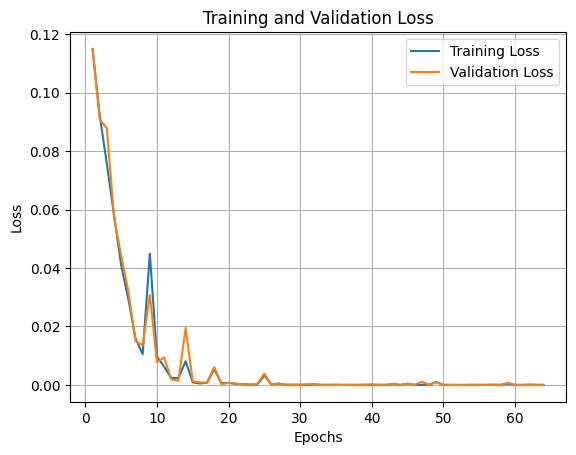

In [ ]:
# Sample training record text
training_record_text = """
Training epoch 1: 100%|██████████| 900/900 [00:43<00:00, 20.56it/s, loss=0.115]
Validation epoch 1: 100%|██████████| 100/100 [00:02<00:00, 35.42it/s, val_loss=0.115]
Training epoch 2: 100%|██████████| 900/900 [00:43<00:00, 20.54it/s, loss=0.0922]
Validation epoch 2: 100%|██████████| 100/100 [00:02<00:00, 35.08it/s, val_loss=0.0909]
Training epoch 3: 100%|██████████| 900/900 [00:42<00:00, 21.12it/s, loss=0.0756]
Validation epoch 3: 100%|██████████| 100/100 [00:04<00:00, 23.16it/s, val_loss=0.0878]
Training epoch 4: 100%|██████████| 900/900 [00:43<00:00, 20.92it/s, loss=0.0581]
Validation epoch 4: 100%|██████████| 100/100 [00:03<00:00, 31.74it/s, val_loss=0.0574]
Training epoch 5: 100%|██████████| 900/900 [00:43<00:00, 20.66it/s, loss=0.0409]
Validation epoch 5: 100%|██████████| 100/100 [00:02<00:00, 35.02it/s, val_loss=0.0442]
Training epoch 6: 100%|██████████| 900/900 [00:42<00:00, 21.03it/s, loss=0.0293]
Validation epoch 6: 100%|██████████| 100/100 [00:03<00:00, 26.83it/s, val_loss=0.032]
Training epoch 7: 100%|██████████| 900/900 [00:41<00:00, 21.62it/s, loss=0.0159]
Validation epoch 7: 100%|██████████| 100/100 [00:02<00:00, 33.46it/s, val_loss=0.015]
Training epoch 8: 100%|██████████| 900/900 [00:42<00:00, 21.34it/s, loss=0.0105]
Validation epoch 8: 100%|██████████| 100/100 [00:02<00:00, 34.80it/s, val_loss=0.0136]
Training epoch 9: 100%|██████████| 900/900 [00:41<00:00, 21.49it/s, loss=0.0449]
Validation epoch 9: 100%|██████████| 100/100 [00:02<00:00, 33.58it/s, val_loss=0.0308]
Training epoch 10: 100%|██████████| 900/900 [00:42<00:00, 21.35it/s, loss=0.00969]
Validation epoch 10: 100%|██████████| 100/100 [00:03<00:00, 32.88it/s, val_loss=0.00776]
Training epoch 11: 100%|██████████| 900/900 [00:41<00:00, 21.55it/s, loss=0.00626]
Validation epoch 11: 100%|██████████| 100/100 [00:03<00:00, 26.78it/s, val_loss=0.00946]
Training epoch 12: 100%|██████████| 900/900 [00:41<00:00, 21.65it/s, loss=0.00235]
Validation epoch 12: 100%|██████████| 100/100 [00:02<00:00, 35.25it/s, val_loss=0.00191]
Training epoch 13: 100%|██████████| 900/900 [00:41<00:00, 21.48it/s, loss=0.00239]
Validation epoch 13: 100%|██████████| 100/100 [00:02<00:00, 35.87it/s, val_loss=0.00139]
Training epoch 14: 100%|██████████| 900/900 [00:41<00:00, 21.61it/s, loss=0.00812]
Validation epoch 14: 100%|██████████| 100/100 [00:03<00:00, 30.61it/s, val_loss=0.0195]
Training epoch 15: 100%|██████████| 900/900 [00:41<00:00, 21.53it/s, loss=0.000857]
Validation epoch 15: 100%|██████████| 100/100 [00:03<00:00, 33.18it/s, val_loss=0.00123]
Training epoch 16: 100%|██████████| 900/900 [00:41<00:00, 21.45it/s, loss=0.00052]
Validation epoch 16: 100%|██████████| 100/100 [00:03<00:00, 29.39it/s, val_loss=0.000837]
Training epoch 17: 100%|██████████| 900/900 [00:41<00:00, 21.56it/s, loss=0.000741]
Validation epoch 17: 100%|██████████| 100/100 [00:02<00:00, 35.32it/s, val_loss=0.000794]
Training epoch 18: 100%|██████████| 900/900 [00:42<00:00, 21.29it/s, loss=0.00538]
Validation epoch 18: 100%|██████████| 100/100 [00:02<00:00, 33.85it/s, val_loss=0.00612]
Training epoch 19: 100%|██████████| 900/900 [00:42<00:00, 21.40it/s, loss=0.0006]
Validation epoch 19: 100%|██████████| 100/100 [00:03<00:00, 27.12it/s, val_loss=0.000285]
Training epoch 20: 100%|██████████| 900/900 [00:41<00:00, 21.47it/s, loss=0.000731]
Validation epoch 20: 100%|██████████| 100/100 [00:02<00:00, 35.86it/s, val_loss=0.000687]
Training epoch 21: 100%|██████████| 900/900 [00:42<00:00, 21.34it/s, loss=0.000391]
Validation epoch 21: 100%|██████████| 100/100 [00:02<00:00, 35.55it/s, val_loss=0.000489]
Training epoch 22: 100%|██████████| 900/900 [00:41<00:00, 21.61it/s, loss=0.000235]
Validation epoch 22: 100%|██████████| 100/100 [00:03<00:00, 29.70it/s, val_loss=0.000196]
Training epoch 23: 100%|██████████| 900/900 [00:42<00:00, 21.35it/s, loss=0.000146]
Validation epoch 23: 100%|██████████| 100/100 [00:02<00:00, 33.34it/s, val_loss=4.82e-5]
Training epoch 24: 100%|██████████| 900/900 [00:41<00:00, 21.43it/s, loss=0.000103]
Validation epoch 24: 100%|██████████| 100/100 [00:03<00:00, 31.16it/s, val_loss=0.000327]
Training epoch 25: 100%|██████████| 900/900 [00:41<00:00, 21.48it/s, loss=0.00322]
Validation epoch 25: 100%|██████████| 100/100 [00:02<00:00, 34.60it/s, val_loss=0.00387]
Training epoch 26: 100%|██████████| 900/900 [00:42<00:00, 21.35it/s, loss=0.000133]
Validation epoch 26: 100%|██████████| 100/100 [00:03<00:00, 32.40it/s, val_loss=9.51e-5]
Training epoch 27: 100%|██████████| 900/900 [00:41<00:00, 21.57it/s, loss=0.000496]
Validation epoch 27: 100%|██████████| 100/100 [00:03<00:00, 26.92it/s, val_loss=0.000376]
Training epoch 28: 100%|██████████| 900/900 [00:42<00:00, 21.32it/s, loss=5.97e-5]
Validation epoch 28: 100%|██████████| 100/100 [00:02<00:00, 35.50it/s, val_loss=7.2e-5]
Training epoch 29: 100%|██████████| 900/900 [00:42<00:00, 21.33it/s, loss=5.35e-5]
Validation epoch 29: 100%|██████████| 100/100 [00:02<00:00, 34.77it/s, val_loss=9.16e-5]
Training epoch 30: 100%|██████████| 900/900 [00:41<00:00, 21.46it/s, loss=4.84e-5]
Validation epoch 30: 100%|██████████| 100/100 [00:03<00:00, 28.03it/s, val_loss=3.29e-5]
Training epoch 31: 100%|██████████| 900/900 [00:42<00:00, 21.39it/s, loss=4.44e-5]
Validation epoch 31: 100%|██████████| 100/100 [00:02<00:00, 35.27it/s, val_loss=0.000262]
Training epoch 32: 100%|██████████| 900/900 [00:42<00:00, 21.37it/s, loss=0.000211]
Validation epoch 32: 100%|██████████| 100/100 [00:03<00:00, 32.74it/s, val_loss=0.000193]
Training epoch 33: 100%|██████████| 900/900 [00:41<00:00, 21.57it/s, loss=2.73e-5]
Validation epoch 33: 100%|██████████| 100/100 [00:02<00:00, 35.18it/s, val_loss=3.19e-5]
Training epoch 34: 100%|██████████| 900/900 [00:42<00:00, 21.32it/s, loss=2.9e-5]
Validation epoch 34: 100%|██████████| 100/100 [00:03<00:00, 32.88it/s, val_loss=2.44e-5]
Training epoch 35: 100%|██████████| 900/900 [00:41<00:00, 21.57it/s, loss=4.98e-5]
Validation epoch 35: 100%|██████████| 100/100 [00:03<00:00, 27.80it/s, val_loss=5.12e-5]
Training epoch 36: 100%|██████████| 900/900 [00:42<00:00, 21.42it/s, loss=1.65e-5]
Validation epoch 36: 100%|██████████| 100/100 [00:02<00:00, 35.32it/s, val_loss=1.65e-5]
Training epoch 37: 100%|██████████| 900/900 [00:42<00:00, 21.33it/s, loss=2.75e-5]
Validation epoch 37: 100%|██████████| 100/100 [00:02<00:00, 34.97it/s, val_loss=3.18e-5]
Training epoch 38: 100%|██████████| 900/900 [00:41<00:00, 21.58it/s, loss=1.11e-5]
Validation epoch 38: 100%|██████████| 100/100 [00:03<00:00, 30.07it/s, val_loss=1.7e-5]
Training epoch 39: 100%|██████████| 900/900 [00:41<00:00, 21.50it/s, loss=4.26e-5]
Validation epoch 39: 100%|██████████| 100/100 [00:02<00:00, 35.15it/s, val_loss=7.28e-5]
Training epoch 40: 100%|██████████| 900/900 [00:42<00:00, 21.37it/s, loss=7.46e-5]
Validation epoch 40: 100%|██████████| 100/100 [00:03<00:00, 30.62it/s, val_loss=0.000186]
Training epoch 41: 100%|██████████| 900/900 [00:41<00:00, 21.50it/s, loss=3.97e-5]
Validation epoch 41: 100%|██████████| 100/100 [00:02<00:00, 35.74it/s, val_loss=3.73e-5]
Training epoch 42: 100%|██████████| 900/900 [00:42<00:00, 21.30it/s, loss=2.36e-5]
Validation epoch 42: 100%|██████████| 100/100 [00:02<00:00, 33.38it/s, val_loss=1.82e-5]
Training epoch 43: 100%|██████████| 900/900 [00:41<00:00, 21.64it/s, loss=0.000304]
Validation epoch 43: 100%|██████████| 100/100 [00:03<00:00, 28.24it/s, val_loss=0.000403]
Training epoch 44: 100%|██████████| 900/900 [00:42<00:00, 21.38it/s, loss=7.02e-6]
Validation epoch 44: 100%|██████████| 100/100 [00:02<00:00, 35.17it/s, val_loss=9.21e-6]
Training epoch 45: 100%|██████████| 900/900 [00:42<00:00, 21.39it/s, loss=0.000449]
Validation epoch 45: 100%|██████████| 100/100 [00:02<00:00, 33.50it/s, val_loss=0.000351]
Training epoch 46: 100%|██████████| 900/900 [00:41<00:00, 21.62it/s, loss=7e-5]
Validation epoch 46: 100%|██████████| 100/100 [00:03<00:00, 32.78it/s, val_loss=4.28e-5]
Training epoch 47: 100%|██████████| 900/900 [00:42<00:00, 21.39it/s, loss=2.7e-5]
Validation epoch 47: 100%|██████████| 100/100 [00:02<00:00, 35.00it/s, val_loss=0.00111]
Training epoch 48: 100%|██████████| 900/900 [00:41<00:00, 21.43it/s, loss=4.25e-5]
Validation epoch 48: 100%|██████████| 100/100 [00:03<00:00, 27.83it/s, val_loss=4.11e-5]
Training epoch 49: 100%|██████████| 900/900 [00:41<00:00, 21.54it/s, loss=0.00102]
Validation epoch 49: 100%|██████████| 100/100 [00:02<00:00, 35.12it/s, val_loss=0.000893]
Training epoch 50: 100%|██████████| 900/900 [00:42<00:00, 21.23it/s, loss=4.86e-5]
Validation epoch 50: 100%|██████████| 100/100 [00:03<00:00, 32.88it/s, val_loss=5.35e-5]
Training epoch 51: 100%|██████████| 900/900 [00:41<00:00, 21.46it/s, loss=1.5e-5]
Validation epoch 51: 100%|██████████| 100/100 [00:03<00:00, 30.56it/s, val_loss=1.05e-5]
Training epoch 52: 100%|██████████| 900/900 [00:42<00:00, 21.31it/s, loss=5.54e-6]
Validation epoch 52: 100%|██████████| 100/100 [00:02<00:00, 35.46it/s, val_loss=8.87e-6]
Training epoch 53: 100%|██████████| 900/900 [00:42<00:00, 21.39it/s, loss=5.07e-6]
Validation epoch 53: 100%|██████████| 100/100 [00:03<00:00, 31.48it/s, val_loss=5.92e-6]
Training epoch 54: 100%|██████████| 900/900 [00:41<00:00, 21.50it/s, loss=2.86e-5]
Validation epoch 54: 100%|██████████| 100/100 [00:02<00:00, 33.53it/s, val_loss=2.92e-5]
Training epoch 55: 100%|██████████| 900/900 [00:42<00:00, 21.23it/s, loss=1.91e-5]
Validation epoch 55: 100%|██████████| 100/100 [00:02<00:00, 35.29it/s, val_loss=1.48e-5]
Training epoch 56: 100%|██████████| 900/900 [00:41<00:00, 21.43it/s, loss=7.34e-6]
Validation epoch 56: 100%|██████████| 100/100 [00:03<00:00, 27.44it/s, val_loss=6.56e-6]
Training epoch 57: 100%|██████████| 900/900 [00:41<00:00, 21.44it/s, loss=5.43e-5]
Validation epoch 57: 100%|██████████| 100/100 [00:02<00:00, 35.29it/s, val_loss=7.73e-5]
Training epoch 58: 100%|██████████| 900/900 [00:42<00:00, 21.22it/s, loss=1.22e-5]
Validation epoch 58: 100%|██████████| 100/100 [00:02<00:00, 34.81it/s, val_loss=1.67e-5]
Training epoch 59: 100%|██████████| 900/900 [00:42<00:00, 21.39it/s, loss=0.000394]
Validation epoch 59: 100%|██████████| 100/100 [00:03<00:00, 29.92it/s, val_loss=0.000725]
Training epoch 60: 100%|██████████| 900/900 [00:42<00:00, 21.33it/s, loss=1.82e-5]
Validation epoch 60: 100%|██████████| 100/100 [00:02<00:00, 33.61it/s, val_loss=2.41e-5]
Training epoch 61: 100%|██████████| 900/900 [00:42<00:00, 21.34it/s, loss=7.19e-6]
Validation epoch 61: 100%|██████████| 100/100 [00:03<00:00, 32.33it/s, val_loss=9.23e-6]
Training epoch 62: 100%|██████████| 900/900 [00:41<00:00, 21.50it/s, loss=9.84e-5]
Validation epoch 62: 100%|██████████| 100/100 [00:03<00:00, 31.92it/s, val_loss=6.48e-5]
Training epoch 63: 100%|██████████| 900/900 [00:43<00:00, 20.52it/s, loss=1.72e-5]
Validation epoch 63: 100%|██████████| 100/100 [00:02<00:00, 34.92it/s, val_loss=3.6e-5]
Training epoch 64: 100%|██████████| 900/900 [00:42<00:00, 21.11it/s, loss=6.45e-6]
Validation epoch 64: 100%|██████████| 100/100 [00:03<00:00, 30.14it/s, val_loss=8.52e-6]

"""

# Regular expressions to extract loss and val_loss
loss_pattern = re.compile(r' loss=([\d.]+(?:e[-+]\d+)?)')
val_loss_pattern = re.compile(r' val_loss=([\d.]+(?:e[-+]\d+)?)')

# Extract loss and val_loss from the text
loss_values = [float(match.group(1)) for match in loss_pattern.finditer(training_record_text)]
val_loss_values = [float(match.group(1)) for match in val_loss_pattern.finditer(training_record_text)]

# Plotting
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# LSTM

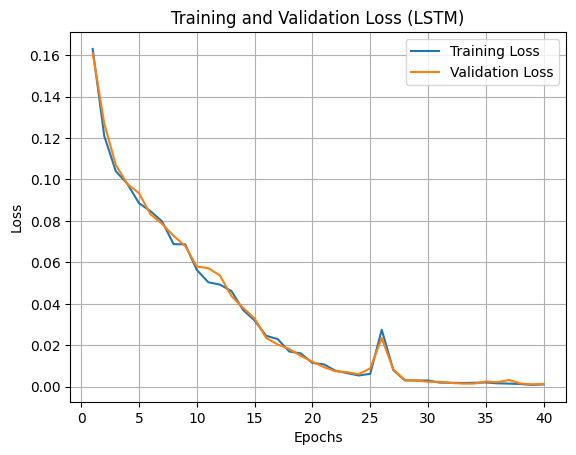

In [ ]:
# Sample training record text
training_record_text = """
Training epoch 1: 100%|██████████| 1800/1800 [00:44<00:00, 40.55it/s, loss=0.163]
Validation epoch 1: 100%|██████████| 200/200 [00:03<00:00, 52.97it/s, val_loss=0.161]
Training epoch 2: 100%|██████████| 1800/1800 [00:43<00:00, 40.92it/s, loss=0.121]
Validation epoch 2: 100%|██████████| 200/200 [00:03<00:00, 60.34it/s, val_loss=0.127]
Training epoch 3: 100%|██████████| 1800/1800 [00:44<00:00, 40.59it/s, loss=0.104]
Validation epoch 3: 100%|██████████| 200/200 [00:03<00:00, 66.15it/s, val_loss=0.107]
Training epoch 4: 100%|██████████| 1800/1800 [00:44<00:00, 40.39it/s, loss=0.0979]
Validation epoch 4: 100%|██████████| 200/200 [00:03<00:00, 65.59it/s, val_loss=0.0978]
Training epoch 5: 100%|██████████| 1800/1800 [00:44<00:00, 40.35it/s, loss=0.0886]
Validation epoch 5: 100%|██████████| 200/200 [00:03<00:00, 62.62it/s, val_loss=0.0934]
Training epoch 6: 100%|██████████| 1800/1800 [00:44<00:00, 40.08it/s, loss=0.0847]
Validation epoch 6: 100%|██████████| 200/200 [00:03<00:00, 65.89it/s, val_loss=0.0832]
Training epoch 7: 100%|██████████| 1800/1800 [00:44<00:00, 40.16it/s, loss=0.0798]
Validation epoch 7: 100%|██████████| 200/200 [00:03<00:00, 66.49it/s, val_loss=0.0786]
Training epoch 8: 100%|██████████| 1800/1800 [00:44<00:00, 40.14it/s, loss=0.0688]
Validation epoch 8: 100%|██████████| 200/200 [00:03<00:00, 60.51it/s, val_loss=0.0728]
Training epoch 9: 100%|██████████| 1800/1800 [00:44<00:00, 40.12it/s, loss=0.0687]
Validation epoch 9: 100%|██████████| 200/200 [00:03<00:00, 55.98it/s, val_loss=0.0679]
Training epoch 10: 100%|██████████| 1800/1800 [00:44<00:00, 40.30it/s, loss=0.0564]
Validation epoch 10: 100%|██████████| 200/200 [00:03<00:00, 51.95it/s, val_loss=0.058]
Training epoch 11: 100%|██████████| 1800/1800 [00:44<00:00, 40.37it/s, loss=0.0504]
Validation epoch 11: 100%|██████████| 200/200 [00:03<00:00, 52.89it/s, val_loss=0.0572]
Training epoch 12: 100%|██████████| 1800/1800 [00:44<00:00, 40.69it/s, loss=0.0493]
Validation epoch 12: 100%|██████████| 200/200 [00:03<00:00, 55.42it/s, val_loss=0.0537]
Training epoch 13: 100%|██████████| 1800/1800 [00:44<00:00, 40.25it/s, loss=0.0462]
Validation epoch 13: 100%|██████████| 200/200 [00:03<00:00, 65.38it/s, val_loss=0.0438]
Training epoch 14: 100%|██████████| 1800/1800 [00:45<00:00, 39.87it/s, loss=0.0371]
Validation epoch 14: 100%|██████████| 200/200 [00:03<00:00, 65.49it/s, val_loss=0.0381]
Training epoch 15: 100%|██████████| 1800/1800 [00:45<00:00, 39.78it/s, loss=0.032]
Validation epoch 15: 100%|██████████| 200/200 [00:03<00:00, 63.47it/s, val_loss=0.033]
Training epoch 16: 100%|██████████| 1800/1800 [00:45<00:00, 39.95it/s, loss=0.0246]
Validation epoch 16: 100%|██████████| 200/200 [00:03<00:00, 64.83it/s, val_loss=0.0236]
Training epoch 17: 100%|██████████| 1800/1800 [00:45<00:00, 39.93it/s, loss=0.023]
Validation epoch 17: 100%|██████████| 200/200 [00:03<00:00, 65.40it/s, val_loss=0.0204]
Training epoch 18: 100%|██████████| 1800/1800 [00:45<00:00, 39.94it/s, loss=0.017]
Validation epoch 18: 100%|██████████| 200/200 [00:03<00:00, 64.06it/s, val_loss=0.0182]
Training epoch 19: 100%|██████████| 1800/1800 [00:44<00:00, 40.05it/s, loss=0.0161]
Validation epoch 19: 100%|██████████| 200/200 [00:03<00:00, 60.01it/s, val_loss=0.0149]
Training epoch 20: 100%|██████████| 1800/1800 [00:44<00:00, 40.09it/s, loss=0.0115]
Validation epoch 20: 100%|██████████| 200/200 [00:03<00:00, 53.42it/s, val_loss=0.0121]
Training epoch 21: 100%|██████████| 1800/1800 [00:44<00:00, 40.29it/s, loss=0.0108]
Validation epoch 21: 100%|██████████| 200/200 [00:03<00:00, 52.58it/s, val_loss=0.00945]
Training epoch 22: 100%|██████████| 1800/1800 [00:44<00:00, 40.09it/s, loss=0.00773]
Validation epoch 22: 100%|██████████| 200/200 [00:03<00:00, 52.39it/s, val_loss=0.00749]
Training epoch 23: 100%|██████████| 1800/1800 [00:44<00:00, 40.33it/s, loss=0.00661]
Validation epoch 23: 100%|██████████| 200/200 [00:03<00:00, 55.71it/s, val_loss=0.00705]
Training epoch 24: 100%|██████████| 1800/1800 [00:44<00:00, 40.30it/s, loss=0.00543]
Validation epoch 24: 100%|██████████| 200/200 [00:03<00:00, 61.73it/s, val_loss=0.00605]
Training epoch 25: 100%|██████████| 1800/1800 [00:44<00:00, 40.10it/s, loss=0.00623]
Validation epoch 25: 100%|██████████| 200/200 [00:03<00:00, 61.44it/s, val_loss=0.00888]
Training epoch 26: 100%|██████████| 1800/1800 [00:44<00:00, 40.21it/s, loss=0.0275]
Validation epoch 26: 100%|██████████| 200/200 [00:03<00:00, 65.35it/s, val_loss=0.0235]
Training epoch 27: 100%|██████████| 1800/1800 [00:44<00:00, 40.05it/s, loss=0.00806]
Validation epoch 27: 100%|██████████| 200/200 [00:03<00:00, 64.70it/s, val_loss=0.00832]
Training epoch 28: 100%|██████████| 1800/1800 [00:45<00:00, 39.94it/s, loss=0.00306]
Validation epoch 28: 100%|██████████| 200/200 [00:03<00:00, 64.28it/s, val_loss=0.00325]
Training epoch 29: 100%|██████████| 1800/1800 [00:44<00:00, 40.04it/s, loss=0.00301]
Validation epoch 29: 100%|██████████| 200/200 [00:03<00:00, 65.01it/s, val_loss=0.00299]
Training epoch 30: 100%|██████████| 1800/1800 [00:45<00:00, 39.98it/s, loss=0.00302]
Validation epoch 30: 100%|██████████| 200/200 [00:03<00:00, 65.05it/s, val_loss=0.0024]
Training epoch 31: 100%|██████████| 1800/1800 [00:44<00:00, 40.05it/s, loss=0.00201]
Validation epoch 31: 100%|██████████| 200/200 [00:03<00:00, 60.65it/s, val_loss=0.0024]
Training epoch 32: 100%|██████████| 1800/1800 [00:44<00:00, 40.23it/s, loss=0.00191]
Validation epoch 32: 100%|██████████| 200/200 [00:03<00:00, 50.57it/s, val_loss=0.00185]
Training epoch 33: 100%|██████████| 1800/1800 [00:44<00:00, 40.36it/s, loss=0.00183]
Validation epoch 33: 100%|██████████| 200/200 [00:03<00:00, 53.25it/s, val_loss=0.0015]
Training epoch 34: 100%|██████████| 1800/1800 [00:44<00:00, 40.17it/s, loss=0.0019]
Validation epoch 34: 100%|██████████| 200/200 [00:03<00:00, 53.29it/s, val_loss=0.00152]
Training epoch 35: 100%|██████████| 1800/1800 [00:44<00:00, 40.10it/s, loss=0.00207]
Validation epoch 35: 100%|██████████| 200/200 [00:03<00:00, 58.17it/s, val_loss=0.00251]
Training epoch 36: 100%|██████████| 1800/1800 [00:45<00:00, 39.90it/s, loss=0.00165]
Validation epoch 36: 100%|██████████| 200/200 [00:03<00:00, 61.71it/s, val_loss=0.00219]
Training epoch 37: 100%|██████████| 1800/1800 [00:45<00:00, 39.86it/s, loss=0.00152]
Validation epoch 37: 100%|██████████| 200/200 [00:03<00:00, 63.73it/s, val_loss=0.00326]
Training epoch 38: 100%|██████████| 1800/1800 [00:45<00:00, 39.86it/s, loss=0.00131]
Validation epoch 38: 100%|██████████| 200/200 [00:03<00:00, 65.80it/s, val_loss=0.00158]
Training epoch 39: 100%|██████████| 1800/1800 [00:44<00:00, 40.05it/s, loss=0.000884]
Validation epoch 39: 100%|██████████| 200/200 [00:03<00:00, 61.43it/s, val_loss=0.00114]
Training epoch 40: 100%|██████████| 1800/1800 [00:45<00:00, 39.76it/s, loss=0.00113]
Validation epoch 40: 100%|██████████| 200/200 [00:03<00:00, 64.41it/s, val_loss=0.00138]
"""

# Regular expressions to extract loss and val_loss
loss_pattern = re.compile(r' loss=([\d.]+(?:e[-+]\d+)?)')
val_loss_pattern = re.compile(r' val_loss=([\d.]+(?:e[-+]\d+)?)')

# Extract loss and val_loss from the text
loss_values = [float(match.group(1)) for match in loss_pattern.finditer(training_record_text)]
val_loss_values = [float(match.group(1)) for match in val_loss_pattern.finditer(training_record_text)]

# Plotting
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 65.75

# GRU

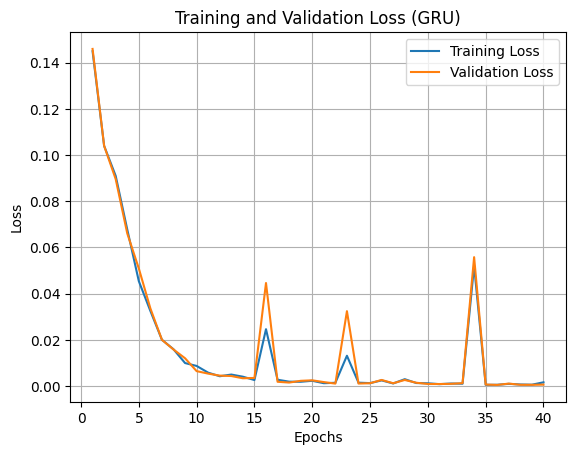

In [ ]:
# Sample training record text
training_record_text = """
Training epoch 1: 100%|██████████| 1800/1800 [00:43<00:00, 41.66it/s, loss=0.145]
Validation epoch 1: 100%|██████████| 200/200 [00:04<00:00, 49.16it/s, val_loss=0.146]
Training epoch 2: 100%|██████████| 1800/1800 [00:42<00:00, 42.00it/s, loss=0.104]
Validation epoch 2: 100%|██████████| 200/200 [00:03<00:00, 60.25it/s, val_loss=0.104]
Training epoch 3: 100%|██████████| 1800/1800 [00:43<00:00, 41.49it/s, loss=0.091]
Validation epoch 3: 100%|██████████| 200/200 [00:03<00:00, 59.56it/s, val_loss=0.0896]
Training epoch 4: 100%|██████████| 1800/1800 [00:42<00:00, 41.90it/s, loss=0.0678]
Validation epoch 4: 100%|██████████| 200/200 [00:03<00:00, 52.23it/s, val_loss=0.0661]
Training epoch 5: 100%|██████████| 1800/1800 [00:43<00:00, 41.67it/s, loss=0.0454]
Validation epoch 5: 100%|██████████| 200/200 [00:03<00:00, 58.07it/s, val_loss=0.0509]
Training epoch 6: 100%|██████████| 1800/1800 [00:43<00:00, 41.34it/s, loss=0.0325]
Validation epoch 6: 100%|██████████| 200/200 [00:03<00:00, 62.07it/s, val_loss=0.0336]
Training epoch 7: 100%|██████████| 1800/1800 [00:43<00:00, 41.10it/s, loss=0.02]
Validation epoch 7: 100%|██████████| 200/200 [00:03<00:00, 60.50it/s, val_loss=0.02]
Training epoch 8: 100%|██████████| 1800/1800 [00:43<00:00, 41.18it/s, loss=0.0159]
Validation epoch 8: 100%|██████████| 200/200 [00:04<00:00, 49.36it/s, val_loss=0.0158]
Training epoch 9: 100%|██████████| 1800/1800 [00:43<00:00, 41.60it/s, loss=0.00993]
Validation epoch 9: 100%|██████████| 200/200 [00:03<00:00, 55.07it/s, val_loss=0.012]
Training epoch 10: 100%|██████████| 1800/1800 [00:43<00:00, 41.16it/s, loss=0.00868]
Validation epoch 10: 100%|██████████| 200/200 [00:03<00:00, 61.06it/s, val_loss=0.00643]
Training epoch 11: 100%|██████████| 1800/1800 [00:44<00:00, 40.88it/s, loss=0.00576]
Validation epoch 11: 100%|██████████| 200/200 [00:03<00:00, 62.20it/s, val_loss=0.00535]
Training epoch 12: 100%|██████████| 1800/1800 [00:43<00:00, 41.46it/s, loss=0.00422]
Validation epoch 12: 100%|██████████| 200/200 [00:04<00:00, 49.49it/s, val_loss=0.00449]
Training epoch 13: 100%|██████████| 1800/1800 [00:42<00:00, 41.87it/s, loss=0.00495]
Validation epoch 13: 100%|██████████| 200/200 [00:03<00:00, 59.64it/s, val_loss=0.00431]
Training epoch 14: 100%|██████████| 1800/1800 [00:43<00:00, 41.32it/s, loss=0.00402]
Validation epoch 14: 100%|██████████| 200/200 [00:03<00:00, 62.53it/s, val_loss=0.00334]
Training epoch 15: 100%|██████████| 1800/1800 [00:43<00:00, 41.30it/s, loss=0.00257]
Validation epoch 15: 100%|██████████| 200/200 [00:03<00:00, 57.59it/s, val_loss=0.00348]
Training epoch 16: 100%|██████████| 1800/1800 [00:43<00:00, 41.83it/s, loss=0.0246]
Validation epoch 16: 100%|██████████| 200/200 [00:04<00:00, 48.38it/s, val_loss=0.0446]
Training epoch 17: 100%|██████████| 1800/1800 [00:42<00:00, 41.92it/s, loss=0.0027]
Validation epoch 17: 100%|██████████| 200/200 [00:03<00:00, 61.20it/s, val_loss=0.00182]
Training epoch 18: 100%|██████████| 1800/1800 [00:45<00:00, 39.84it/s, loss=0.00187]
Validation epoch 18: 100%|██████████| 200/200 [00:03<00:00, 55.76it/s, val_loss=0.00148]
Training epoch 19: 100%|██████████| 1800/1800 [00:44<00:00, 40.16it/s, loss=0.00182]
Validation epoch 19: 100%|██████████| 200/200 [00:03<00:00, 56.52it/s, val_loss=0.00223]
Training epoch 20: 100%|██████████| 1800/1800 [00:44<00:00, 40.83it/s, loss=0.00225]
Validation epoch 20: 100%|██████████| 200/200 [00:04<00:00, 47.43it/s, val_loss=0.00245]
Training epoch 21: 100%|██████████| 1800/1800 [00:44<00:00, 40.21it/s, loss=0.0012]
Validation epoch 21: 100%|██████████| 200/200 [00:04<00:00, 48.48it/s, val_loss=0.00169]
Training epoch 22: 100%|██████████| 1800/1800 [00:44<00:00, 40.42it/s, loss=0.00138]
Validation epoch 22: 100%|██████████| 200/200 [00:03<00:00, 55.84it/s, val_loss=0.00103]
Training epoch 23: 100%|██████████| 1800/1800 [00:45<00:00, 39.86it/s, loss=0.0131]
Validation epoch 23: 100%|██████████| 200/200 [00:03<00:00, 61.66it/s, val_loss=0.0324]
Training epoch 24: 100%|██████████| 1800/1800 [00:44<00:00, 40.14it/s, loss=0.00143]
Validation epoch 24: 100%|██████████| 200/200 [00:03<00:00, 53.74it/s, val_loss=0.00105]
Training epoch 25: 100%|██████████| 1800/1800 [00:44<00:00, 40.41it/s, loss=0.00124]
Validation epoch 25: 100%|██████████| 200/200 [00:04<00:00, 45.41it/s, val_loss=0.00119]
Training epoch 26: 100%|██████████| 1800/1800 [00:44<00:00, 40.46it/s, loss=0.00242]
Validation epoch 26: 100%|██████████| 200/200 [00:04<00:00, 49.45it/s, val_loss=0.00261]
Training epoch 27: 100%|██████████| 1800/1800 [00:45<00:00, 39.13it/s, loss=0.00109]
Validation epoch 27: 100%|██████████| 200/200 [00:03<00:00, 58.39it/s, val_loss=0.00118]
Training epoch 28: 100%|██████████| 1800/1800 [00:44<00:00, 40.11it/s, loss=0.00294]
Validation epoch 28: 100%|██████████| 200/200 [00:03<00:00, 58.02it/s, val_loss=0.0026]
Training epoch 29: 100%|██████████| 1800/1800 [00:44<00:00, 40.55it/s, loss=0.00128]
Validation epoch 29: 100%|██████████| 200/200 [00:03<00:00, 59.42it/s, val_loss=0.0014]
Training epoch 30: 100%|██████████| 1800/1800 [00:44<00:00, 40.67it/s, loss=0.00117]
Validation epoch 30: 100%|██████████| 200/200 [00:03<00:00, 51.82it/s, val_loss=0.000875]
Training epoch 31: 100%|██████████| 1800/1800 [00:43<00:00, 41.24it/s, loss=0.000792]
Validation epoch 31: 100%|██████████| 200/200 [00:03<00:00, 54.34it/s, val_loss=0.000847]
Training epoch 32: 100%|██████████| 1800/1800 [00:44<00:00, 40.84it/s, loss=0.00107]
Validation epoch 32: 100%|██████████| 200/200 [00:03<00:00, 59.88it/s, val_loss=0.00093]
Training epoch 33: 100%|██████████| 1800/1800 [00:45<00:00, 39.16it/s, loss=0.000984]
Validation epoch 33: 100%|██████████| 200/200 [00:03<00:00, 60.33it/s, val_loss=0.00122]
Training epoch 34: 100%|██████████| 1800/1800 [00:45<00:00, 39.66it/s, loss=0.0521]
Validation epoch 34: 100%|██████████| 200/200 [00:03<00:00, 56.36it/s, val_loss=0.0558]
Training epoch 35: 100%|██████████| 1800/1800 [00:45<00:00, 39.76it/s, loss=0.000496]
Validation epoch 35: 100%|██████████| 200/200 [00:03<00:00, 53.12it/s, val_loss=0.000617]
Training epoch 36: 100%|██████████| 1800/1800 [00:44<00:00, 40.26it/s, loss=0.000526]
Validation epoch 36: 100%|██████████| 200/200 [00:04<00:00, 47.36it/s, val_loss=0.000458]
Training epoch 37: 100%|██████████| 1800/1800 [00:43<00:00, 40.97it/s, loss=0.000924]
Validation epoch 37: 100%|██████████| 200/200 [00:03<00:00, 56.00it/s, val_loss=0.00103]
Training epoch 38: 100%|██████████| 1800/1800 [00:44<00:00, 40.53it/s, loss=0.000649]
Validation epoch 38: 100%|██████████| 200/200 [00:03<00:00, 59.99it/s, val_loss=0.000509]
Training epoch 39: 100%|██████████| 1800/1800 [00:44<00:00, 40.52it/s, loss=0.000557]
Validation epoch 39: 100%|██████████| 200/200 [00:03<00:00, 61.04it/s, val_loss=0.000501]
Training epoch 40: 100%|██████████| 1800/1800 [00:44<00:00, 40.10it/s, loss=0.00159]
Validation epoch 40: 100%|██████████| 200/200 [00:03<00:00, 54.21it/s, val_loss=0.000589]
"""

# Regular expressions to extract loss and val_loss
loss_pattern = re.compile(r' loss=([\d.]+(?:e[-+]\d+)?)')
val_loss_pattern = re.compile(r' val_loss=([\d.]+(?:e[-+]\d+)?)')

# Extract loss and val_loss from the text
loss_values = [float(match.group(1)) for match in loss_pattern.finditer(training_record_text)]
val_loss_values = [float(match.group(1)) for match in val_loss_pattern.finditer(training_record_text)]

# Plotting
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 66.39


# RNN

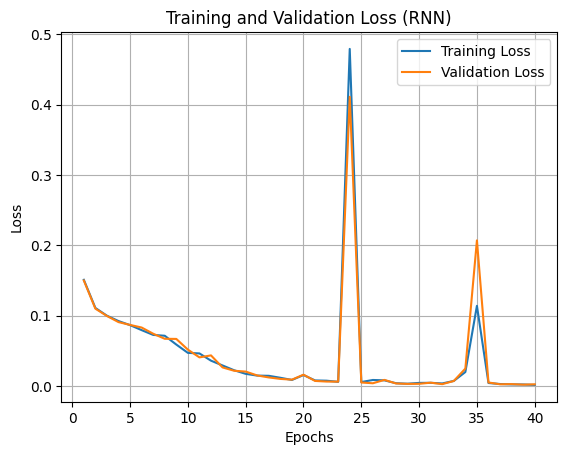

In [ ]:
# Sample training record text
training_record_text = """
Training epoch 1: 100%|██████████| 1800/1800 [00:37<00:00, 48.53it/s, loss=0.151]
Validation epoch 1: 100%|██████████| 200/200 [00:03<00:00, 60.83it/s, val_loss=0.15]
Training epoch 2: 100%|██████████| 1800/1800 [00:36<00:00, 48.77it/s, loss=0.111]
Validation epoch 2: 100%|██████████| 200/200 [00:03<00:00, 52.02it/s, val_loss=0.11]
Training epoch 3: 100%|██████████| 1800/1800 [00:36<00:00, 49.56it/s, loss=0.1]
Validation epoch 3: 100%|██████████| 200/200 [00:03<00:00, 56.90it/s, val_loss=0.0996]
Training epoch 4: 100%|██████████| 1800/1800 [00:37<00:00, 48.19it/s, loss=0.0924]
Validation epoch 4: 100%|██████████| 200/200 [00:03<00:00, 61.91it/s, val_loss=0.0909]
Training epoch 5: 100%|██████████| 1800/1800 [00:38<00:00, 47.36it/s, loss=0.0866]
Validation epoch 5: 100%|██████████| 200/200 [00:03<00:00, 63.72it/s, val_loss=0.0869]
Training epoch 6: 100%|██████████| 1800/1800 [00:37<00:00, 48.64it/s, loss=0.0795]
Validation epoch 6: 100%|██████████| 200/200 [00:03<00:00, 50.51it/s, val_loss=0.0832]
Training epoch 7: 100%|██████████| 1800/1800 [00:36<00:00, 49.14it/s, loss=0.0727]
Validation epoch 7: 100%|██████████| 200/200 [00:03<00:00, 64.84it/s, val_loss=0.0744]
Training epoch 8: 100%|██████████| 1800/1800 [00:37<00:00, 48.54it/s, loss=0.0715]
Validation epoch 8: 100%|██████████| 200/200 [00:03<00:00, 62.38it/s, val_loss=0.0672]
Training epoch 9: 100%|██████████| 1800/1800 [00:37<00:00, 48.46it/s, loss=0.059]
Validation epoch 9: 100%|██████████| 200/200 [00:03<00:00, 59.91it/s, val_loss=0.067]
Training epoch 10: 100%|██████████| 1800/1800 [00:37<00:00, 48.56it/s, loss=0.0472]
Validation epoch 10: 100%|██████████| 200/200 [00:03<00:00, 53.57it/s, val_loss=0.0518]
Training epoch 11: 100%|██████████| 1800/1800 [00:37<00:00, 47.40it/s, loss=0.0464]
Validation epoch 11: 100%|██████████| 200/200 [00:03<00:00, 64.99it/s, val_loss=0.0408]
Training epoch 12: 100%|██████████| 1800/1800 [00:37<00:00, 48.14it/s, loss=0.0361]
Validation epoch 12: 100%|██████████| 200/200 [00:03<00:00, 64.11it/s, val_loss=0.0436]
Training epoch 13: 100%|██████████| 1800/1800 [00:36<00:00, 48.70it/s, loss=0.0293]
Validation epoch 13: 100%|██████████| 200/200 [00:03<00:00, 51.45it/s, val_loss=0.0265]
Training epoch 14: 100%|██████████| 1800/1800 [00:36<00:00, 48.77it/s, loss=0.0225]
Validation epoch 14: 100%|██████████| 200/200 [00:03<00:00, 63.62it/s, val_loss=0.0218]
Training epoch 15: 100%|██████████| 1800/1800 [00:36<00:00, 48.78it/s, loss=0.0174]
Validation epoch 15: 100%|██████████| 200/200 [00:03<00:00, 60.85it/s, val_loss=0.0206]
Training epoch 16: 100%|██████████| 1800/1800 [00:41<00:00, 43.06it/s, loss=0.0149]
Validation epoch 16: 100%|██████████| 200/200 [00:04<00:00, 43.09it/s, val_loss=0.0151]
Training epoch 17: 100%|██████████| 1800/1800 [00:42<00:00, 42.37it/s, loss=0.0146]
Validation epoch 17: 100%|██████████| 200/200 [00:03<00:00, 61.15it/s, val_loss=0.0123]
Training epoch 18: 100%|██████████| 1800/1800 [00:39<00:00, 45.18it/s, loss=0.0118]
Validation epoch 18: 100%|██████████| 200/200 [00:03<00:00, 55.72it/s, val_loss=0.0102]
Training epoch 19: 100%|██████████| 1800/1800 [00:38<00:00, 46.48it/s, loss=0.00873]
Validation epoch 19: 100%|██████████| 200/200 [00:03<00:00, 61.31it/s, val_loss=0.00914]
Training epoch 20: 100%|██████████| 1800/1800 [00:38<00:00, 46.81it/s, loss=0.0157]
Validation epoch 20: 100%|██████████| 200/200 [00:03<00:00, 51.43it/s, val_loss=0.0162]
Training epoch 21: 100%|██████████| 1800/1800 [00:38<00:00, 46.53it/s, loss=0.00804]
Validation epoch 21: 100%|██████████| 200/200 [00:03<00:00, 58.12it/s, val_loss=0.00733]
Training epoch 22: 100%|██████████| 1800/1800 [00:38<00:00, 46.82it/s, loss=0.00766]
Validation epoch 22: 100%|██████████| 200/200 [00:03<00:00, 58.84it/s, val_loss=0.00644]
Training epoch 23: 100%|██████████| 1800/1800 [00:38<00:00, 46.42it/s, loss=0.00604]
Validation epoch 23: 100%|██████████| 200/200 [00:03<00:00, 51.91it/s, val_loss=0.00632]
Training epoch 24: 100%|██████████| 1800/1800 [00:38<00:00, 46.45it/s, loss=0.479]
Validation epoch 24: 100%|██████████| 200/200 [00:03<00:00, 60.84it/s, val_loss=0.411]
Training epoch 25: 100%|██████████| 1800/1800 [00:38<00:00, 46.63it/s, loss=0.00575]
Validation epoch 25: 100%|██████████| 200/200 [00:03<00:00, 53.80it/s, val_loss=0.00511]
Training epoch 26: 100%|██████████| 1800/1800 [00:39<00:00, 46.11it/s, loss=0.00869]
Validation epoch 26: 100%|██████████| 200/200 [00:03<00:00, 61.78it/s, val_loss=0.00402]
Training epoch 27: 100%|██████████| 1800/1800 [00:39<00:00, 45.79it/s, loss=0.00816]
Validation epoch 27: 100%|██████████| 200/200 [00:03<00:00, 61.29it/s, val_loss=0.00879]
Training epoch 28: 100%|██████████| 1800/1800 [00:38<00:00, 46.62it/s, loss=0.00408]
Validation epoch 28: 100%|██████████| 200/200 [00:04<00:00, 47.19it/s, val_loss=0.00373]
Training epoch 29: 100%|██████████| 1800/1800 [00:39<00:00, 46.13it/s, loss=0.00341]
Validation epoch 29: 100%|██████████| 200/200 [00:03<00:00, 61.57it/s, val_loss=0.00312]
Training epoch 30: 100%|██████████| 1800/1800 [00:38<00:00, 46.39it/s, loss=0.00453]
Validation epoch 30: 100%|██████████| 200/200 [00:03<00:00, 53.13it/s, val_loss=0.00325]
Training epoch 31: 100%|██████████| 1800/1800 [00:38<00:00, 46.22it/s, loss=0.00467]
Validation epoch 31: 100%|██████████| 200/200 [00:03<00:00, 62.68it/s, val_loss=0.00484]
Training epoch 32: 100%|██████████| 1800/1800 [00:38<00:00, 46.59it/s, loss=0.00376]
Validation epoch 32: 100%|██████████| 200/200 [00:03<00:00, 62.07it/s, val_loss=0.00278]
Training epoch 33: 100%|██████████| 1800/1800 [00:38<00:00, 46.75it/s, loss=0.00732]
Validation epoch 33: 100%|██████████| 200/200 [00:04<00:00, 49.09it/s, val_loss=0.00725]
Training epoch 34: 100%|██████████| 1800/1800 [00:39<00:00, 45.92it/s, loss=0.02]
Validation epoch 34: 100%|██████████| 200/200 [00:03<00:00, 61.90it/s, val_loss=0.0249]
Training epoch 35: 100%|██████████| 1800/1800 [00:38<00:00, 46.67it/s, loss=0.114]
Validation epoch 35: 100%|██████████| 200/200 [00:03<00:00, 57.08it/s, val_loss=0.207]
Training epoch 36: 100%|██████████| 1800/1800 [00:39<00:00, 45.34it/s, loss=0.00439]
Validation epoch 36: 100%|██████████| 200/200 [00:03<00:00, 61.16it/s, val_loss=0.00512]
Training epoch 37: 100%|██████████| 1800/1800 [00:39<00:00, 45.99it/s, loss=0.00294]
Validation epoch 37: 100%|██████████| 200/200 [00:03<00:00, 62.25it/s, val_loss=0.00257]
Training epoch 38: 100%|██████████| 1800/1800 [00:38<00:00, 46.53it/s, loss=0.0024]
Validation epoch 38: 100%|██████████| 200/200 [00:04<00:00, 48.45it/s, val_loss=0.0028]
Training epoch 39: 100%|██████████| 1800/1800 [00:38<00:00, 46.49it/s, loss=0.00229]
Validation epoch 39: 100%|██████████| 200/200 [00:03<00:00, 62.81it/s, val_loss=0.00204]
Training epoch 40: 100%|██████████| 1800/1800 [00:38<00:00, 46.54it/s, loss=0.00166]
Validation epoch 40: 100%|██████████| 200/200 [00:03<00:00, 60.61it/s, val_loss=0.00252]
"""

# Regular expressions to extract loss and val_loss
loss_pattern = re.compile(r' loss=([\d.]+(?:e[-+]\d+)?)')
val_loss_pattern = re.compile(r' val_loss=([\d.]+(?:e[-+]\d+)?)')

# Extract loss and val_loss from the text
loss_values = [float(match.group(1)) for match in loss_pattern.finditer(training_record_text)]
val_loss_values = [float(match.group(1)) for match in val_loss_pattern.finditer(training_record_text)]

# Plotting
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.title('Training and Validation Loss (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 67.25


# 新增區段